In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [7]:
train_path='Dataset\\train\\'
valid_path='Dataset\\test\\'

In [8]:
os.listdir(train_path)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight']

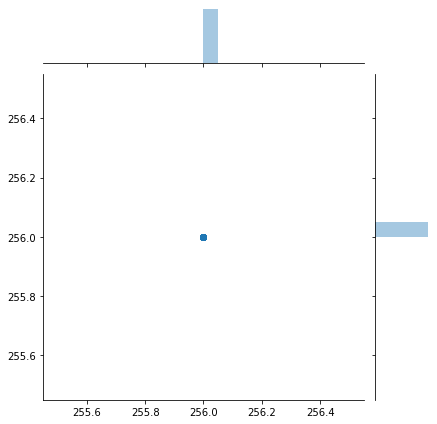

In [9]:
# dimension_check
dim1=[]
dim2=[]

for image_filename in os.listdir(valid_path+'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'):
    img=imread(valid_path+'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)
    
    
sns.jointplot(dim1,dim2)    

In [10]:
IMAGE_SIZE=[244,244]
folders=glob(train_path+'/*')

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False


In [12]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)      

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
traindata_gen=ImageDataGenerator(
                             rotation_range=10,
                             rescale=1./255,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1./255)

In [15]:
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size = (224, 224,),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6776 images belonging to 4 classes.


In [16]:
#traning_set.class_indices

In [17]:
testing_set=testdata_gen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 1834 images belonging to 4 classes.


In [19]:
result = model.fit_generator(
  traning_set,
  validation_data=testing_set,
  epochs=5,
  steps_per_epoch=len(traning_set),
  validation_steps=len(testing_set)
)

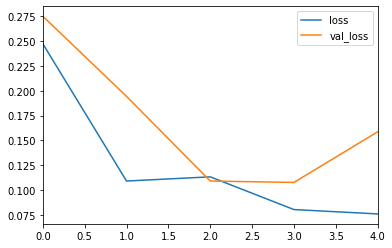

In [26]:
losses=pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
from tensorflow.keras.models import load_model
model.save('maize_disease_detection_new_model.h5')


# testing for a single image 


In [93]:
test_image='C:\\Users\\1CYNOSA1\\Desktop\\vgg16\\valid\\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\065fe7da-dcaf-41be-9332-5ec5ebceb94b___RS_GLSp 9337_270deg.JPG'

In [90]:
from tensorflow.keras.preprocessing import image


In [91]:
my_image=image.load_img(test_image,target_size=IMAGE_SIZE)

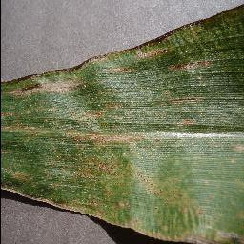

In [92]:
my_image

In [78]:
my_image = image.img_to_array(my_image)


In [79]:
my_image=np.expand_dims(my_image,axis=0)
my_image.shape

(1, 244, 244, 3)

In [81]:
x=model.predict(my_image)
x

array([[1., 0., 0., 0.]], dtype=float32)

In [64]:
traning_set.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [109]:
y='C:\\Users\\1CYNOSA1\\Desktop\\vgg16\\valid\\Corn_(maize)___healthy\\d976fc74-23c2-4c34-a068-db120a61fe0f___R.S_HL 5561 copy_flipLR.jpg'

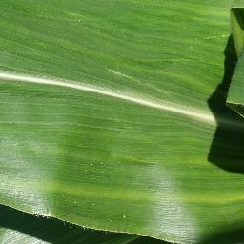

In [110]:
test2=image.load_img(y,target_size=IMAGE_SIZE)
test2


In [111]:
test2=image.img_to_array(test2)
test2.shape
test2=np.expand_dims(test2,axis=0)
test2.shape

(1, 244, 244, 3)

In [112]:
model.predict(test2)

array([[9.9945086e-01, 0.0000000e+00, 0.0000000e+00, 5.4913416e-04]],
      dtype=float32)